# Random Forest Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('../Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Random Forest Classification model on the Training set

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Making the Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[102   5]
 [  6  58]]


0.935672514619883

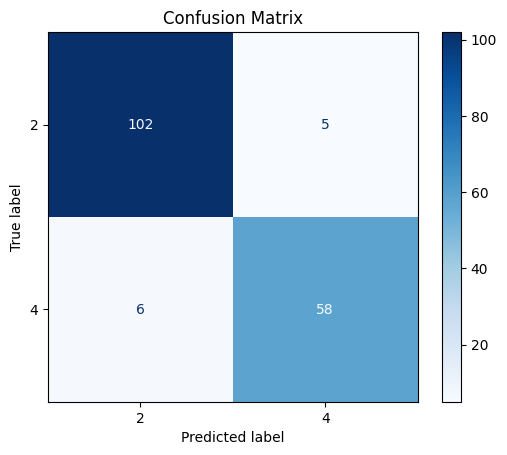

Accuracy: 0.935672514619883
              precision    recall  f1-score   support

           2       0.94      0.95      0.95       107
           4       0.92      0.91      0.91        64

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [7]:
#Alternative: My Own
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, normalize=None,  # or 'true'/'pred' for rates
    cmap='Blues', values_format='d'  # use '.2f' if normalized
)
plt.title('Confusion Matrix')
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))